<a href="https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/SVM_4_Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/notebooks/SVM_4_Hyperparameter_tuning.ipynb)

# **Grid/Randomized Search CV**

* Hyperparameters are model-specific properties that are ‘fixed’ by the ML engineer before training.
* Hyperparameter Tuning = searching for the right set of hyperparameter.
* Commonly used hyper-parameter tuning techniques: Grid Search,
Random Search

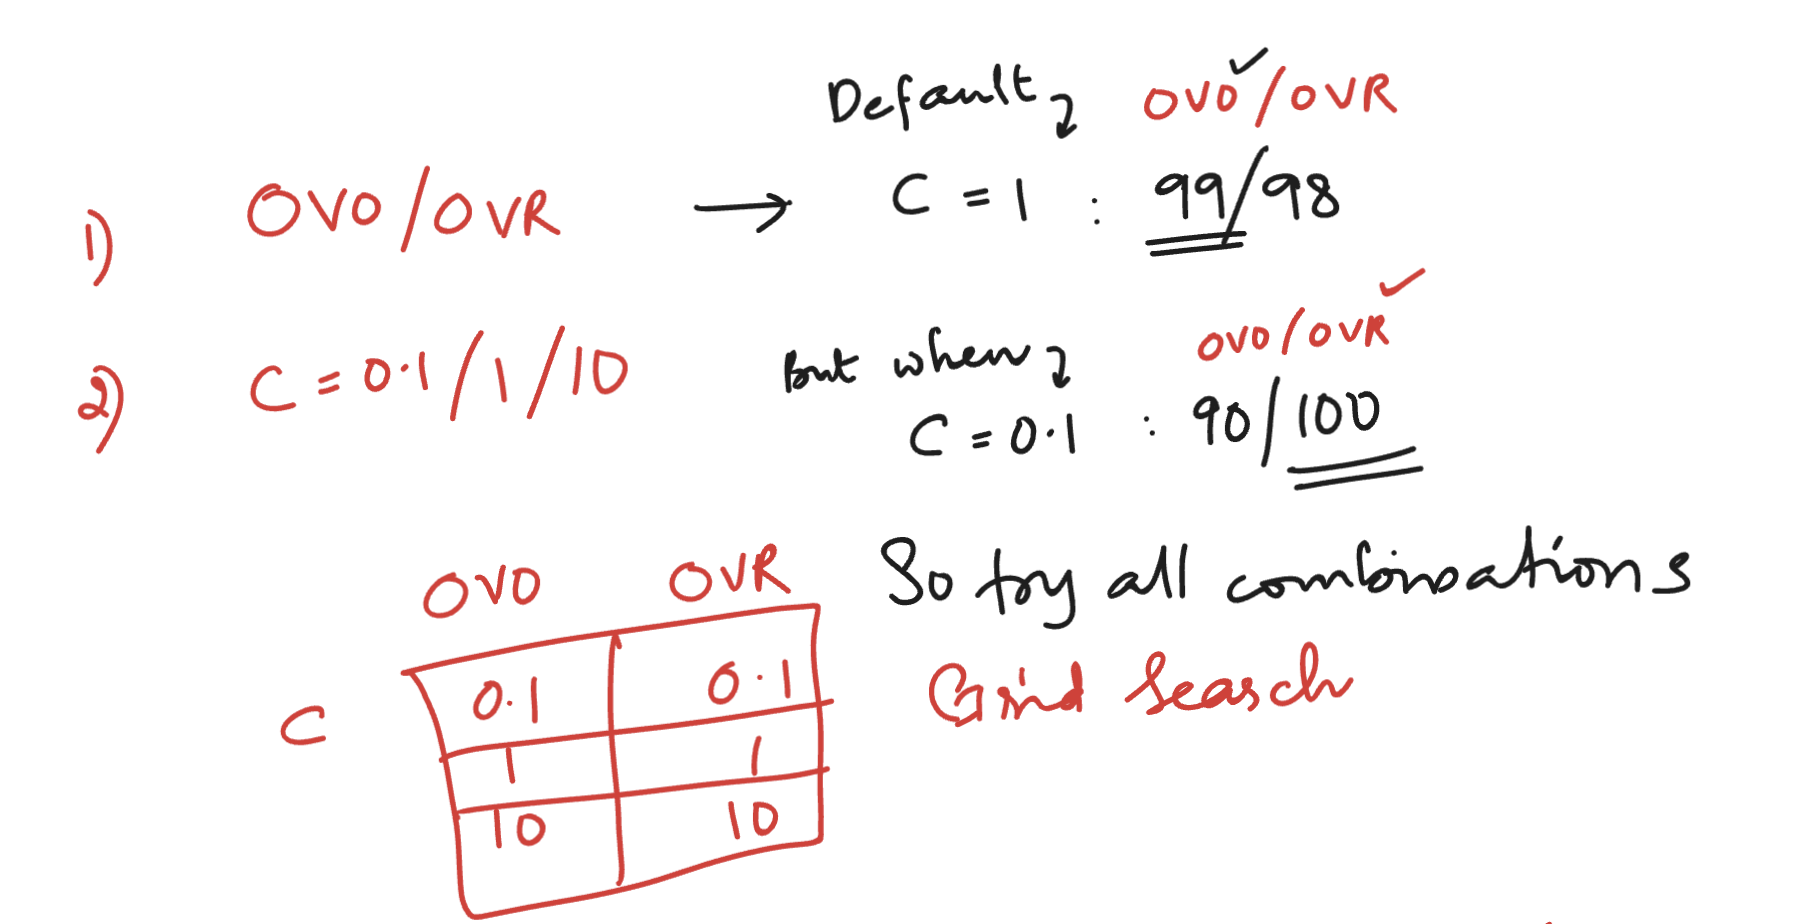

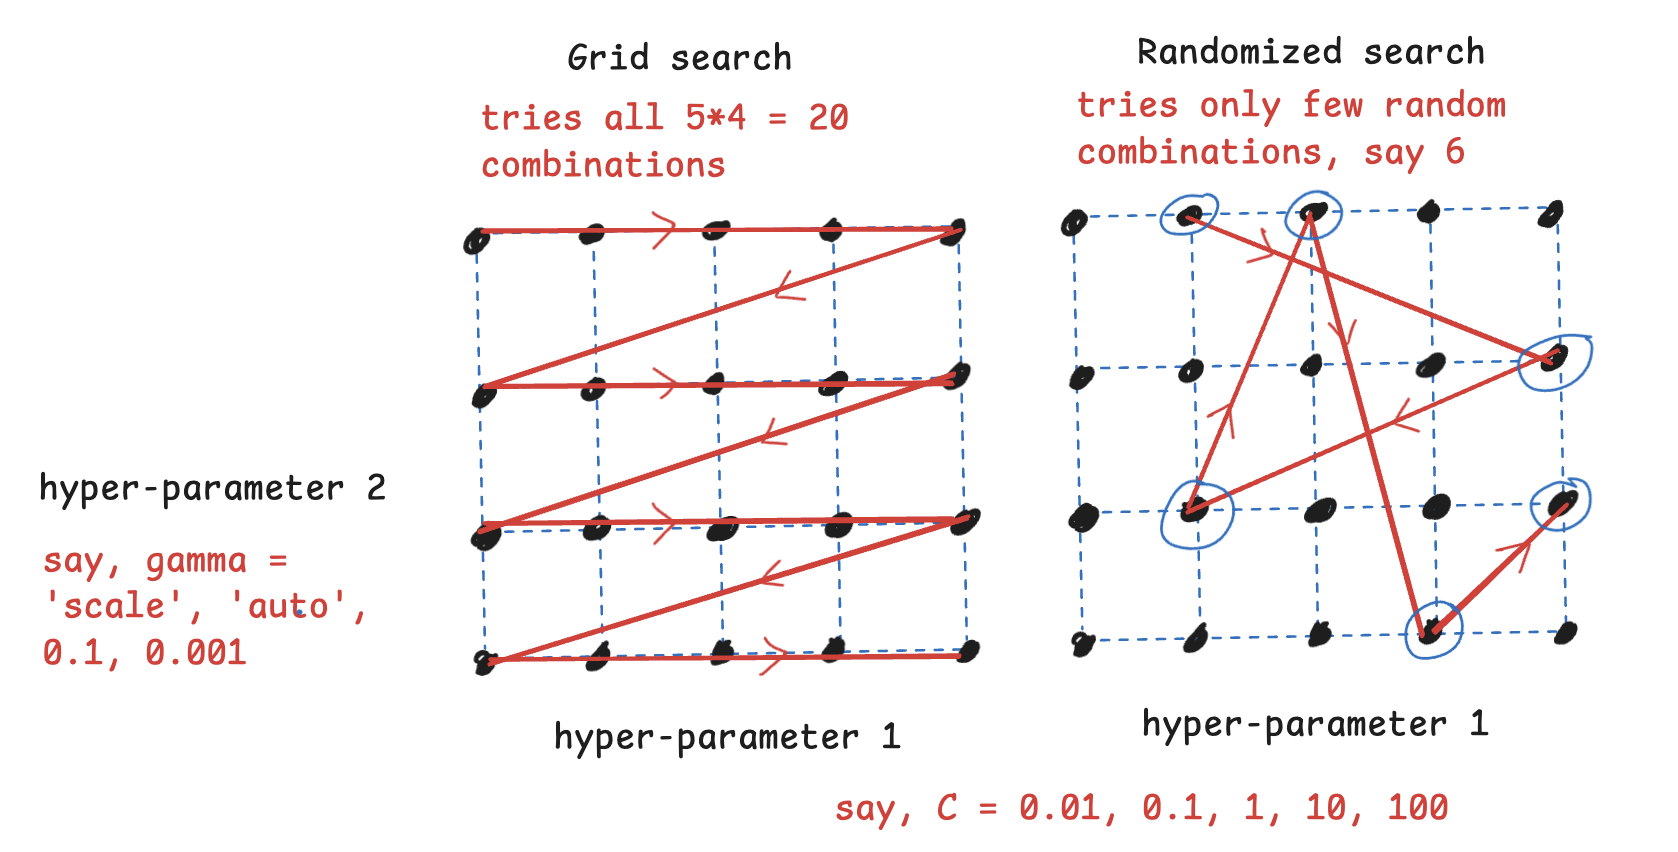

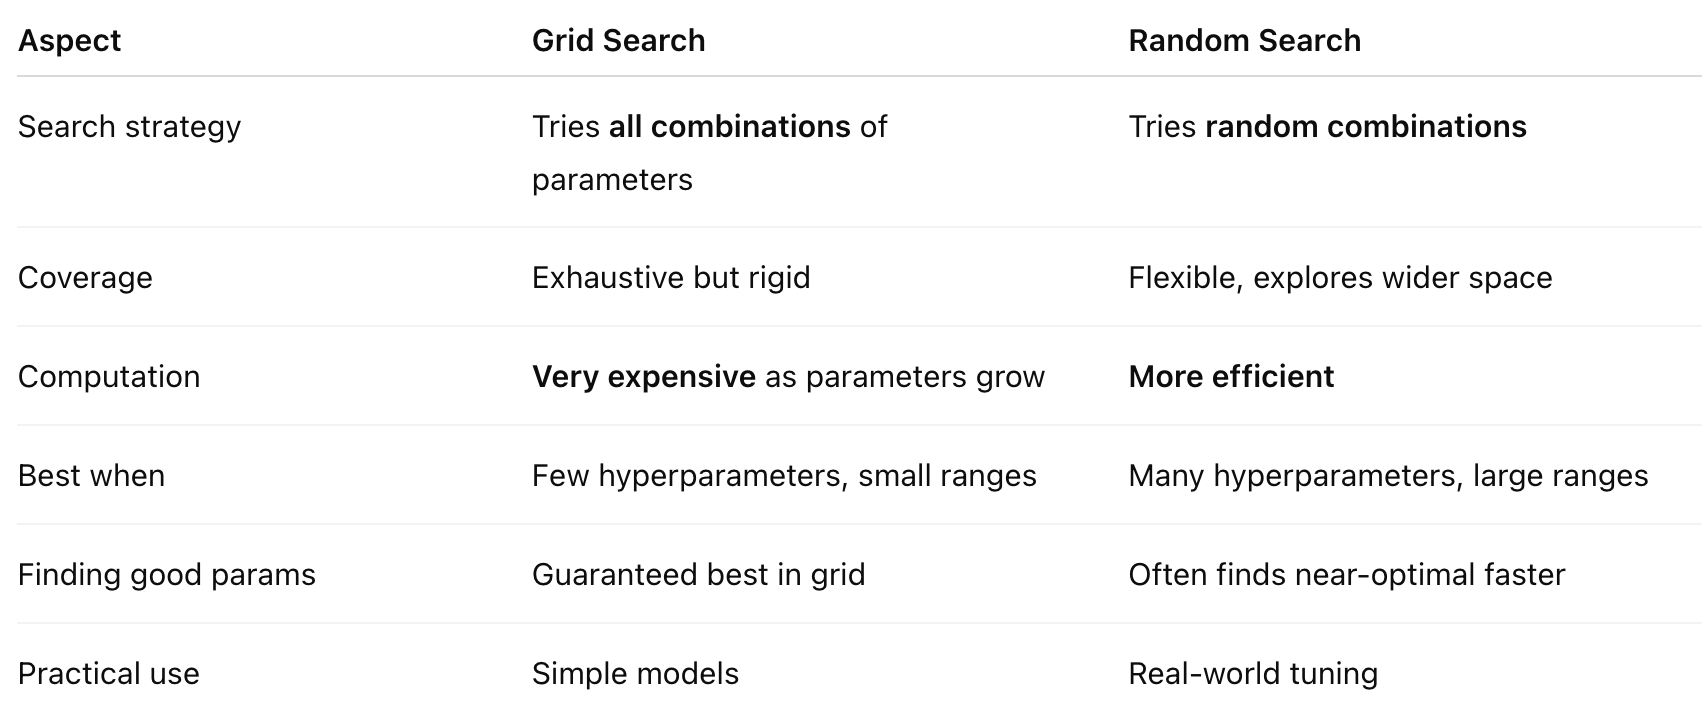

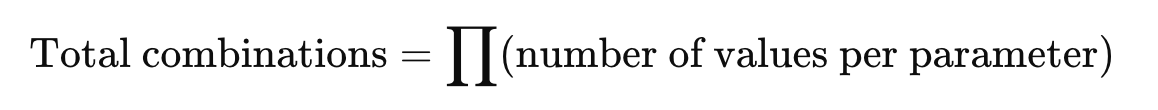


* Automates the process of hyper-parameter tuning by testing various combinations of parameters.
* Helps to identify the best hyper-parameter combination that optimizes the model’s performance, making the tuning process much more efficient and less prone to human error.
* Grid search systematically explores a predefined set of different hyper-parameter values, effectively creating a grid of all possible configurations.
* It then streamlines the optimization process by testing each combination automatically, saving time and effort.
* Random search saves time and resources by trying only a few random combinations.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline (scaling + SVM)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [ ]:
# Parameter grid: dictionary format
param_grid = {
    "svm__decision_function_shape": ["ovo", "ovr"],
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", 0.01, 0.1]
}

# Grid Search
grid = GridSearchCV(
    pipe,
    param_grid,
    cv = 5,
    scoring="accuracy",
    n_jobs=-1
)

# Fit
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))

In [ ]:
# Random search
grid = RandomizedSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_iter=5,   # ← number of combinations tried
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

# Fit
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))